# Bankruptcy Prediction Model(Classification)


### In this Lesson we will train a model to predict whether a company will go bankrupt in the future

<a href='https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction/data' target=_blank>You can find the data file here</a>

<img src=https://slator.com/assets/2024/01/WCS-Group-Bankrupt.png width='400'>

In [27]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [28]:
df=pd.read_csv('bank.csv')

In [29]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [4]:
df.shape

(6819, 96)

In [5]:
df[' Net Income Flag'].value_counts()

 Net Income Flag
1    6819
Name: count, dtype: int64

In [6]:
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
 Operating Expense Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                                               0
 Net Val

In [7]:
abs(df.corr(numeric_only=True)['Bankrupt?'].sort_values(ascending=False))

Bankrupt?                                                   1.000000
 Debt ratio %                                               0.250161
 Current Liability to Assets                                0.194494
 Borrowing dependency                                       0.176543
 Current Liability to Current Assets                        0.171306
 Liability to Equity                                        0.166812
 Current Liabilities/Equity                                 0.153828
 Current Liability to Equity                                0.153828
 Liability-Assets Flag                                      0.139212
 Total expense/Assets                                       0.139049
 Equity to Long-term Liability                              0.139014
 Cash/Current Liability                                     0.077921
 Inventory and accounts receivable/Net value                0.075278
 Fixed Assets Turnover Frequency                            0.072818
 Contingent liabilities/Net worth 

In [8]:
x=df.drop(['Bankrupt?',' Net Income Flag'],axis=1)
y=df[['Bankrupt?']]

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten,Dropout, BatchNormalization
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [11]:
model=Sequential()
model.add(Dense(480,activation='relu'))
model.add(Dense(340,activation='relu'))
model.add(Dense(240,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(20,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=30,verbose=1)

Epoch 1/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9679 - loss: 0.2396 - val_accuracy: 0.9626 - val_loss: 0.2432
Epoch 2/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9674 - loss: 0.1504 - val_accuracy: 0.9626 - val_loss: 0.1910
Epoch 3/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9718 - loss: 0.1277 - val_accuracy: 0.9626 - val_loss: 0.3149
Epoch 4/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9659 - loss: 0.1492 - val_accuracy: 0.9626 - val_loss: 0.1669
Epoch 5/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9719 - loss: 0.1267 - val_accuracy: 0.9626 - val_loss: 0.1459
Epoch 6/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9688 - loss: 0.1317 - val_accuracy: 0.9626 - val_loss: 0.1720
Epoch 7/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9738 - loss: 0.1164 - val_accuracy: 0.9626 - val_loss: 0.1557
Epoch 8/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9680 - loss: 0.1331 - val_accuracy: 0.

In [13]:
loss,accuracy=model.evaluate(x_test,y_test)

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.9523 - loss: 0.1882


In [14]:
accuracy

0.9626099467277527

In [15]:
tahmin=model.predict(x_test)

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [16]:
model.save('model.keras')

In [17]:
print(y_test)

      Bankrupt?
239           0
2850          0
2687          0
6500          1
2684          0
...         ...
1357          0
3946          0
5491          0
2112          0
6423          0

[1364 rows x 1 columns]


In [18]:
import matplotlib.pyplot as plt

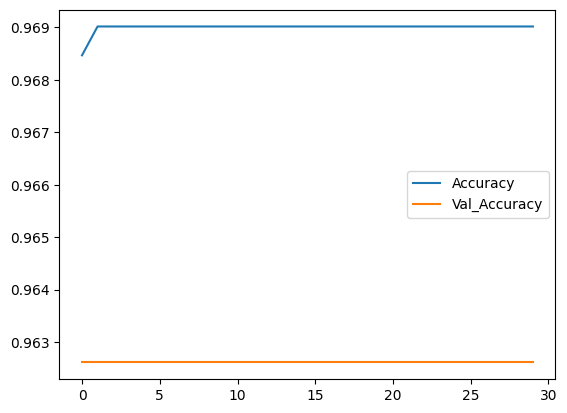

In [19]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend();

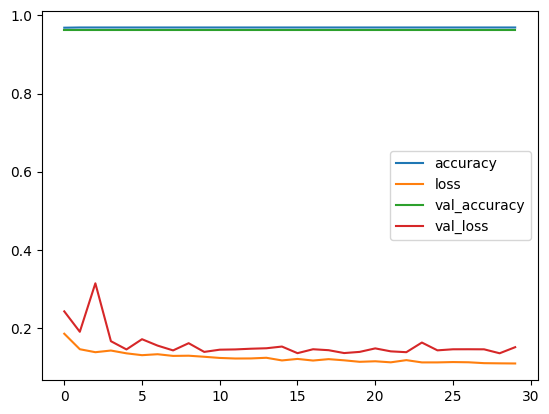

In [20]:
loss_f=pd.DataFrame(history.history)
loss_f.plot();

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [22]:
confusion_matrix(y_test, np.argmax(tahmin, axis=1))

array([[1313,    0],
       [  51,    0]])

In [23]:
cm=confusion_matrix(y_test, np.argmax(tahmin, axis=1))

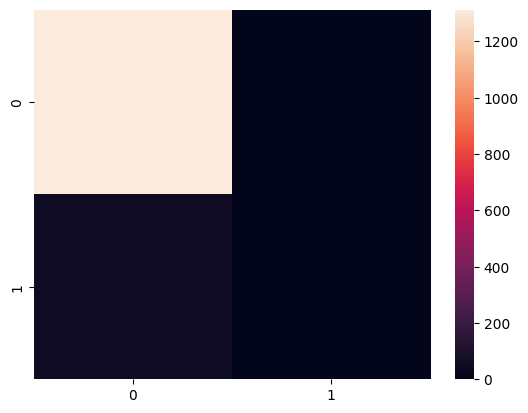

In [25]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, np.argmax(tahmin, axis=1)), annot=False);

In [26]:
print(classification_report(y_test, np.argmax(tahmin, axis=1)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.00      0.00      0.00        51

    accuracy                           0.96      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.96      0.94      1364




## Our success rate is accuracy 0.96. With this model, creditor individuals or institutions can predict whether they will be able to collect their receivables from their workplaces